In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('merged_data.csv')
df.head(), df.shape, df['지역별'].unique()


(        시점 지역별  저출산율  고용률  학생수  사설학원수  사교육참여율  수술인원  인터넷이용률  근로시간  어린이집  \
 0  2000.01  강원  1.60  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN   
 1  2000.01  경기  1.63  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN   
 2  2000.01  경남  1.59  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN   
 3  2000.01  경북  1.58  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN   
 4  2000.01  광주  1.64  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN   
 
    이동인구수  인구밀집도 주택유형별 주택규모별  ratio  
 0    NaN    NaN   NaN   NaN    NaN  
 1    NaN    NaN   NaN   NaN    NaN  
 2    NaN    NaN   NaN   NaN    NaN  
 3    NaN    NaN   NaN   NaN    NaN  
 4    NaN    NaN   NaN   NaN    NaN  ,
 (9990, 16),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북', '경상', '충청', '광역시', '대도시외',
        '세종특별자치시', '전라'], dtype=object))

In [2]:
# object → int
from sklearn.preprocessing import LabelEncoder

le_disaster = LabelEncoder()
df['지역별'] = le_disaster.fit_transform(df['지역별'])
df['주택유형별'] = le_disaster.fit_transform(df['주택유형별'])
df['주택규모별'] = le_disaster.fit_transform(df['주택규모별'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      9990 non-null   float64
 1   지역별     9990 non-null   int32  
 2   저출산율    5766 non-null   float64
 3   고용률     3752 non-null   float64
 4   학생수     3810 non-null   float64
 5   사설학원수   5046 non-null   float64
 6   사교육참여율  3870 non-null   float64
 7   수술인원    4158 non-null   float64
 8   인터넷이용률  3052 non-null   float64
 9   근로시간    3414 non-null   float64
 10  어린이집    3702 non-null   float64
 11  이동인구수   4044 non-null   float64
 12  인구밀집도   2357 non-null   float64
 13  주택유형별   9990 non-null   int32  
 14  주택규모별   9990 non-null   int32  
 15  ratio   4140 non-null   float64
dtypes: float64(13), int32(3)
memory usage: 1.1 MB


In [3]:
# 결측치
# df.isnull().sum()
df_copy = df.dropna()
df_copy.isnull().sum()

# # 데이터 저장
# df_copy.to_csv('final_merged_data.csv', index=False)

시점        0
지역별       0
저출산율      0
고용률       0
학생수       0
사설학원수     0
사교육참여율    0
수술인원      0
인터넷이용률    0
근로시간      0
어린이집      0
이동인구수     0
인구밀집도     0
주택유형별     0
주택규모별     0
ratio     0
dtype: int64

<Axes: >

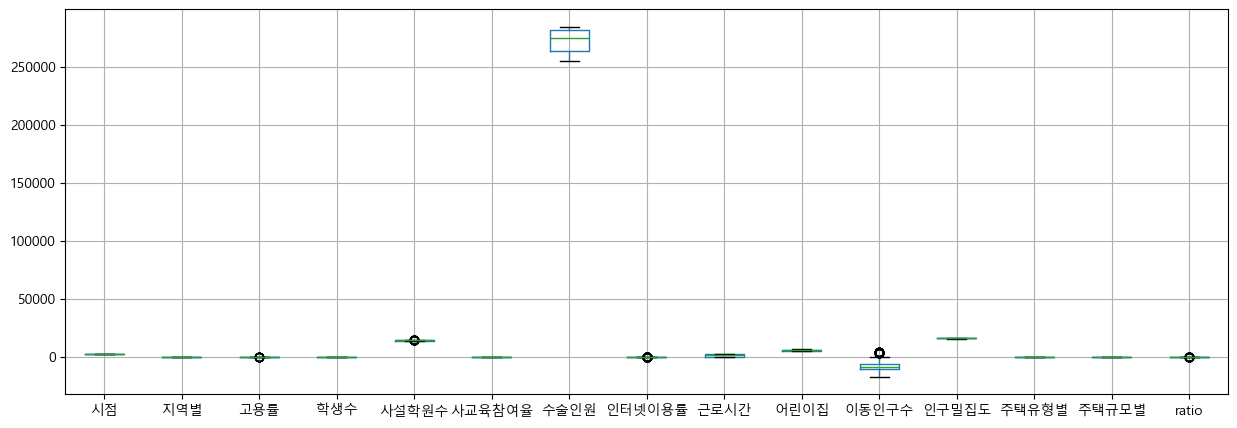

In [4]:
# 이상치 확인
df_copy.drop('저출산율', axis=1).boxplot(figsize=(15,5))

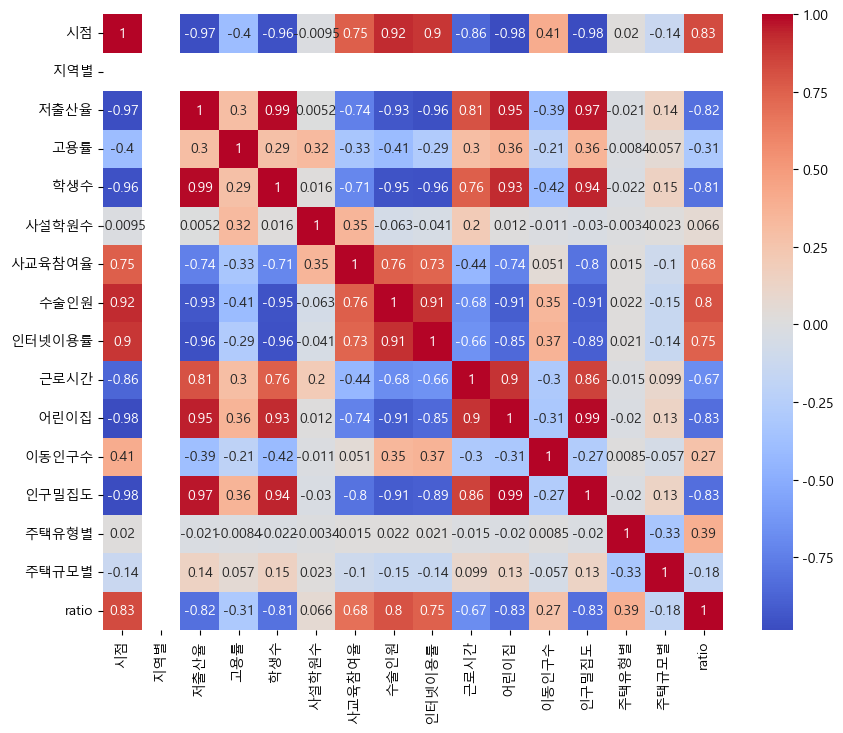

In [5]:
# 상관관계
import seaborn as sns

corr_mat = df_copy.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [6]:
# 왜도 확인
df_copy.skew()

시점       -0.111391
지역별       0.000000
저출산율      0.598790
고용률      -0.772841
학생수       0.661226
사설학원수     0.677659
사교육참여율    0.100203
수술인원     -0.326275
인터넷이용률   -1.118257
근로시간     -0.454196
어린이집     -0.183274
이동인구수     0.605643
인구밀집도     0.039784
주택유형별     0.446292
주택규모별     0.230485
ratio    -0.761396
dtype: float64

In [7]:
select_df = df_copy[['사교육참여율', '근로시간', '이동인구수', '사설학원수', 'ratio', '저출산율']]
select_df.head(), select_df.shape

(      사교육참여율    근로시간   이동인구수    사설학원수   ratio  저출산율
 4226    74.3  2100.0 -3055.0  13989.0  70.463   1.0
 4227    74.3  2100.0 -3055.0  13989.0  74.382   1.0
 4228    74.3  2100.0 -3055.0  13989.0  75.040   1.0
 4229    74.3  2100.0 -3055.0  13989.0  78.388   1.0
 4230    74.3  2100.0 -3055.0  13989.0  80.434   1.0,
 (782, 6))

In [8]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = select_df.drop(columns=['저출산율'])
y = select_df['저출산율']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 모델 훈련
# from sklearn.linear_model import LassoCV
# model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
# model.fit(X_train_scaled, y_train)
# print(model.alpha_)

# # Lasso : 훈련:97%, 테스트:97%, mse:0.0003, r2:97%
# from sklearn.linear_model import Lasso
# model = Lasso(alpha=0.01)

# # LinearRegression : 훈련:98%, 테스트:99%, mse:0.0002, r2:98%
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# # Ridge : 훈련:98%, 테스트:99%, mse:0.0002, r2:98%
# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)

# # ElasticNet : 훈련:80%, 테스트:79%, mse:0.003, r2:79%
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# # DecisionTreeRegressor = 훈련:100%, 테스트:100%, mse:2.31, r2:100%
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

# RandomForestRegressor = 훈련:99%, 테스트:99%, mse:3.2271762208236206e-09, r2:99%
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150)

# # GradientBoostingRegressor = 훈련:99%, 테스트:99%, mse:7.323842829433921e-08, r2:99%
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()

# # MLPRegressor = 훈련:62%, 테스트:66%, mse:0.005, r2:66%
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

# # # SVR = 훈련:70%, 테스트:71%, mse:0.004, r2:71%
# from sklearn.svm import SVR
# model = SVR(kernel='rbf', C=100, epsilon=0.1)

# # KNeighborsRegressor = 훈련:100%, 테스트:100%, mse:3.0618605994844208e-33, r2:100%
# from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [11]:
# 훈련 정확도
train_acc = model.score(X_train_scaled, y_train)
train_acc

0.9999999122434525

In [12]:
# 테스트 정확도
test_acc = model.score(X_test_scaled, y_test)
test_acc

0.9999997137280311

In [13]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

4.472753007756244e-09

In [14]:
# r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
r2

0.9999997137280311